of data https://dacon.io/competitions/official/235626/data

In [1]:
!unzip emnist.zip

Archive:  emnist.zip
  inflating: submission.csv          
  inflating: test.csv                
  inflating: train.csv               


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
train_df = pd.read_csv("train.csv")

In [28]:
train_df.head()

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,...,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,...,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,...,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,...,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2


In [29]:
train_df = train_df.sample(frac=1).reset_index(drop=True)

In [30]:
y = train_df.digit.to_numpy()
print(y.shape)

(2048,)


In [31]:
train_df = train_df.drop(columns=['id', 'digit', 'letter'])
print(train_df.head())

   0  1  2  3  4  5  6  7  8  9  ...  774  775  776  777  778  779  780  781  \
0  3  3  2  1  1  2  4  4  1  3  ...    0    1    0    3    2    0    2    2   
1  0  2  0  4  4  4  1  2  0  0  ...    0    2    4    3    1    2    2    3   
2  0  1  0  1  0  3  4  4  4  3  ...    3    3    1    2    1    1    4    0   
3  2  3  4  0  2  0  0  3  4  4  ...    4    3    2    1    4    3    1    3   
4  2  1  2  3  2  4  0  2  2  4  ...    3    3    1    0    1    2    3    0   

   782  783  
0    1    1  
1    1    0  
2    2    0  
3    3    1  
4    3    3  

[5 rows x 784 columns]


In [32]:
x = train_df.to_numpy()
print(x.shape)

(2048, 784)


In [33]:
x = x.reshape((-1,28,28,1))
print(x.shape)

(2048, 28, 28, 1)


6


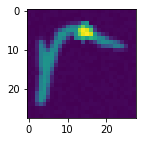

6


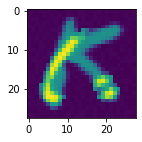

4


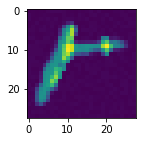

5


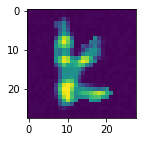

8


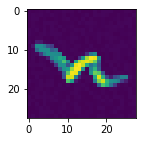

In [34]:
for i in range(5):
    print(y[i])
    plt.figure(figsize=(2,2))
    plt.imshow(x[i].squeeze())
    plt.show()

In [35]:
split_index = int(len(x)*0.8)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

In [ ]:
# copy from https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e

from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):
    self.epochs = []
    self.losses = []
    self.val_losses = []
    self.logs = []
    self.fig = plt.figure()


  def on_epoch_end(self, epoch, logs={}):

    self.epochs.append(epoch)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    clear_output(wait=True)
    plt.plot(self.epochs, self.losses, label="loss")
    plt.plot(self.epochs, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])

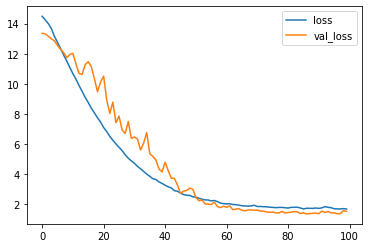

loss =  1.666331171989441 , val_loss =  1.505882978439331
13/13 [==============================] - 1s 66ms/step - loss: 1.6663 - acc: 0.8443 - val_loss: 1.5059 - val_acc: 0.9133


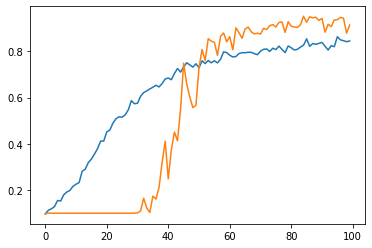

13/13 [==============================] - 0s 8ms/step - loss: 1.5059 - acc: 0.9133
loss= 1.5058811902999878
acc= 0.9133089184761047


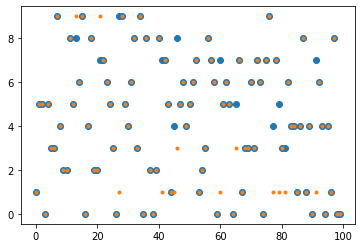

In [74]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.regularizers import l1, l2, L1L2
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

model = keras.Sequential()
model.add(Input((28, 28, 1)))
model.add(GaussianNoise(0.1))

model.add(Conv2D(32, (5,5), padding='same', activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Conv2D(32, (5,5), padding='same', activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Conv2D(32, (5,5), padding='same', activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(64, (5,5), padding='same', activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Conv2D(64, (5,5), padding='same', activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Conv2D(64, (5,5), padding='same', activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(128, (5,5), padding='same', activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Conv2D(128, (5,5), padding='same', activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Conv2D(128, (5,5), padding='same', activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="Adam", metrics=['acc'])
model.summary()

def normalize(image):
  return image/255.0

preprocessor = normalize
BATCH_SIZE = 128

train_data_generator = ImageDataGenerator(
      rotation_range=2,
      width_shift_range=0.05,
      height_shift_range=0.05,
      horizontal_flip=False,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow(train_x, train_y,
      batch_size=BATCH_SIZE,
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow(train_x, train_y,
      batch_size=BATCH_SIZE,
)


plot_losses = PlotLosses()
history = model.fit(
      train_data_generator,
      validation_data=test_data_generator,     
      epochs=100,
      callbacks=[plot_losses]
)


plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()



loss, acc = model.evaluate(
      test_data_generator,
)
print("loss=", loss)
print("acc=", acc)



test_x, test_y = next(iter(test_data_generator))
y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(test_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()